# VDI Python Notebook Example
NCI Virtual Desktop Training -- January 2016 -- Geoscience Australia


#### Objectives of this simple demo:
- Launch jupyter (ipython) notebook from VDI
- Access netCDF data directly from /g/data  
- Access netCDF data using OPeNDAP


### Import libraries

In [4]:
!which conda
!python -V

/xdisk/anaconda2/bin/conda
Python 2.7.12 :: Anaconda custom (64-bit)


In [19]:
!conda install -y scikit-learn


Fetching package metadata .......
Solving package specifications: ..........

Package plan for installation in environment /xdisk/anaconda2:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mkl-11.3.3                 |                0       122.1 MB
    openblas-0.2.14            |                4         3.6 MB
    mkl-service-1.1.2          |           py27_2          13 KB
    numpy-1.10.4               |           py27_2         6.0 MB
    numexpr-2.5.2              |      np110py27_1         345 KB
    scipy-0.16.0               |      np110py27_1        23.9 MB
    scikit-learn-0.17.1        |      np110py27_2         8.6 MB
    ------------------------------------------------------------
                                           Total:       164.5 MB

The following NEW packages will be INSTALLED:

    openblas:     0.2.14-4          

The following packages will be UPDATED:

  

In [12]:
import sys
print sys.version

2.7.11 |Anaconda 4.0.0 (64-bit)| (default, Dec  6 2015, 18:08:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [18]:
# a very long list sys.modules.keys()
import pip #needed to use the pip functions
for i in pip.get_installed_distributions(local_only=True):
    print(i)

Orange-Bioinformatics 2.6.19
slumber 0.7.1
Genesis-PyAPI 1.2.0
setuptools 20.3
Sphinx 1.3.5
datashape 0.5.1
pycrypto 2.6.1
futures 3.0.3
ptyprocess 0.5
itsdangerous 0.24
Babel 2.2.0
jupyter 1.0.0
pip 8.1.1
Jinja2 2.8
pycparser 2.14
XlsxWriter 0.8.4
toolz 0.7.4
docutils 0.12
spyder 2.3.8
jupyter-console 4.1.1
xlrd 0.9.4
path.py 0.0.0
nbformat 4.0.1
jdcal 1.2
fastcache 1.0.2
pexpect 4.0.1
Cython 0.23.4
multipledispatch 0.4.8
beautifulsoup4 4.4.1
jupyter-client 4.2.2
anaconda-navigator 1.1.0
pyasn1 0.1.9
Pillow 3.1.1
traitlets 4.2.1
mpmath 0.19
blaze 0.9.1
matplotlib 1.5.1
numba 0.24.0
notebook 4.1.0
greenlet 0.4.9
pickleshare 0.5
qtconsole 4.2.0
nbconvert 4.1.0
chest 0.2.3
python-dateutil 2.5.1
backports.ssl-match-hostname 3.4.0.2
tornado 4.3
grin 1.2.1
backports-abc 0.4
dynd 0.7.3.dev1
ipython 4.1.2
idna 2.0
argcomplete 1.0.0
sphinx-rtd-theme 0.1.9
sockjs-tornado 1.0.1
ipaddress 1.0.14
rope 0.9.4
pycurl 7.19.5.3
mistune 0.7.2
statsmodels 0.6.1
Flask-Cors 2.1.2
cdecimal 2.3
bitarray 0.8.

In [22]:
!which pip

!pip install pandas_datareader

/xdisk/anaconda2/bin/pip
  Running setup.py bdist_wheel for requests-file ... - done
  Stored in directory: /home/fxz547/.cache/pip/wheels/a4/4c/1c/8f22cae3cebc5e0b7da07bbf4feee223c2c86702e391c47df0
Successfully built requests-file
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Only 2 required for this demo
from netCDF4 import Dataset
import matplotlib.pyplot as plt

/xdisk/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Accessing a file directly on /g/data
- Note: This does not yet load/extract data

In [27]:
f = Dataset('/g/data/rr5/satellite/obs/himawari8/FLDK/2016/01/03/0030/20160103003000-P1S-ABOM_BRF_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc', 'r')

#### Can use the netCDF4 library to see information about the file

In [28]:
## Display dimensions for file
for item in f.dimensions:
    print item, f.dimensions[item]

time <type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1

y <type 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 5500

x <type 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 5500



In [29]:
## Look at variables
vars = f.variables.keys()
for item in vars:
    print 'Variable: \t', item
    print 'Dimensions: \t', f[item].dimensions
    print 'Shape:    \t', f[item].shape, '\n'

Variable: 	time
Dimensions: 	(u'time',)
Shape:    	(1,) 

Variable: 	y
Dimensions: 	(u'y',)
Shape:    	(5500,) 

Variable: 	x
Dimensions: 	(u'x',)
Shape:    	(5500,) 

Variable: 	geostationary
Dimensions: 	()
Shape:    	() 

Variable: 	scan_line_time
Dimensions: 	(u'y',)
Shape:    	(5500,) 

Variable: 	channel_0002_brf
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(1, 5500, 5500) 



#### Extracting data
- A really nice feature of netCDF/HDF files is that you can extract subsets without having to load entire file into memory

In [30]:
%%timeit

i1 = 1000
i2 = 4000
ch02 = f['channel_0002_brf'][0, i1:i2, i1:i2]
y = f.variables['y'][i1:i2]
x = f.variables['x'][i1:i2]

1 loops, best of 3: 293 ms per loop


#### Plotting

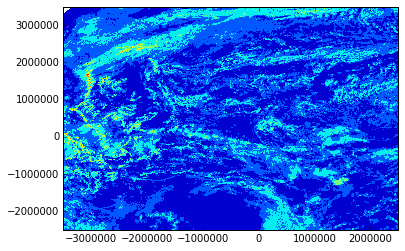

In [31]:
%matplotlib inline 
plt.contourf(x, y, ch02)

### Accessing a file using OPeNDAP
- Advantage: If dataset available, you can access from anywhere just as you'd call a local file. 
- Disadvantage: Not as fast as having the file locally. 

Note: You can see how fast the data extraction was with the '%%timeit' function in the cell above and compare it to the length of time OPeNDAP method takes in the cell below. 

In [23]:
f = Dataset('http://dapds00.nci.org.au/thredds/dodsC/rr5/satellite/obs/himawari8/FLDK/2016/01/03/0030/20160103003000-P1S-ABOM_BRF_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc', 'r')

#### After opening the file with the OPeNDAP address, the file can be handled no differently to the above in situ example. 

In [24]:
## Display dimensions for file
for item in f.dimensions:
    print item, f.dimensions[item]

time <type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1

x <type 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 5500

y <type 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 5500



In [28]:
# %%timeit

i1 = 1000
i2 = 4000
ch02 = f['channel_0002_brf'][0, i1:i2, i1:i2]
y = f.variables['y'][i1:i2]
x = f.variables['x'][i1:i2]

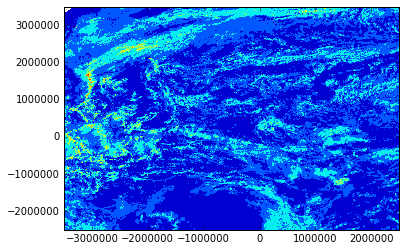

In [29]:
%matplotlib inline 
plt.contourf(x, y, ch02)